# Naudojamos bibliotekos:

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [21]:
failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-house.csv"
house_duomenys = pd.read_csv(failo_kelias)

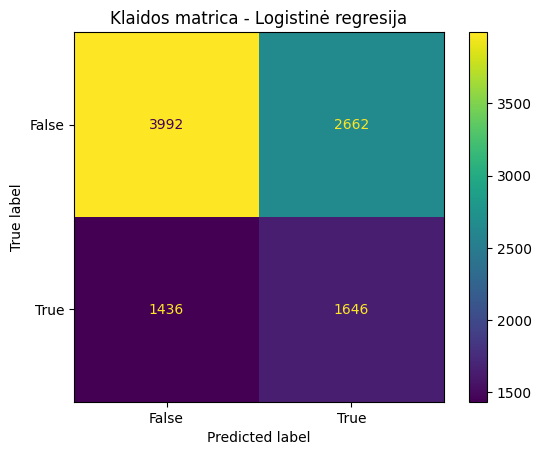

Tikslumas: 0.5790879211175021
ROC AUC: 0.5686038629138387
Klasifikacijos ataskaita:
               precision    recall  f1-score   support

       False       0.74      0.60      0.66      6654
        True       0.38      0.53      0.45      3082

    accuracy                           0.58      9736
   macro avg       0.56      0.57      0.55      9736
weighted avg       0.62      0.58      0.59      9736



In [23]:
# Užkoduoti 'party_simplified' stulpelį
encoder = LabelEncoder()
house_duomenys["party_simplified"] = encoder.fit_transform(house_duomenys["party_simplified"].astype(str))

# Pašalinti trūkstamas reikšmes iš savybių stulpelių
isvalyti_duomenys = house_duomenys[["year", "state_fips", "party_simplified", "totalvotes", "laimetojas"]].dropna()

# Paruošti savybes (X) ir tikslą (y)
savybes = isvalyti_duomenys[["year", "state_fips", "party_simplified", "totalvotes"]]
tikslas = isvalyti_duomenys["laimetojas"]

# Padalinti duomenis į mokymo ir testavimo rinkinius
mokymo_duomenys, testavimo_duomenys, mokymo_tikslas, testavimo_tikslas = train_test_split(
    savybes, tikslas, test_size=0.3, random_state=42
)

# Logistinės regresijos modelis su subalansuotomis klasėmis
log_reg_modelis = LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)
log_reg_modelis.fit(mokymo_duomenys, mokymo_tikslas)

# Prognozės ir vertinimo metrikos
prognozes = log_reg_modelis.predict(testavimo_duomenys)
tikslumas = accuracy_score(testavimo_tikslas, prognozes)
roc_auc = roc_auc_score(testavimo_tikslas, log_reg_modelis.predict_proba(testavimo_duomenys)[:, 1])
klasifikacijos_ataskaita = classification_report(testavimo_tikslas, prognozes)

# Klaidos matricos atvaizdavimas
ConfusionMatrixDisplay.from_estimator(log_reg_modelis, testavimo_duomenys, testavimo_tikslas)
plt.title("Klaidos matrica - Logistinė regresija")
plt.show()
print("Tikslumas:", tikslumas)
print("ROC AUC:", roc_auc)
print("Klasifikacijos ataskaita:\n", klasifikacijos_ataskaita)

Rezultatų analizė:

Tikslumas (Accuracy) yra 57.9%, kas rodo, jog modelis teisingai klasifikuoja tik kiek daugiau nei pusę stebėjimų. Nors tikslumas atrodo žemas, reikia įvertinti klasių disbalansą bei „True“ ir „False“ klasių atskyrimo galimybes.

ROC AUC vertė yra 0.5686, kas rodo labai ribotą modelio gebėjimą atskirti teigiamas (True) ir neigiamas (False) klases. Artima 0.5 reikšmė ROC AUC skalėje signalizuoja, jog modelis neturi aiškios diskriminacinės galios.

Klasifikacijos ataskaita:
False klasė (nelaimėtojai):
Precision = 0.74: modelis gana tiksliai prognozuoja nelaimėtojus, nes dauguma prognozių (etiketė „False“) yra teisingos.

Recall = 0.60: modelis identifikuoja tik 60% visų nelaimėtojų, todėl praleidžia reikšmingą jų dalį.

F1-score = 0.66: tai balansas tarp precision ir recall, kuris rodo, kad nelaimėtojų klasifikacija vidutiniška.

True klasė (laimėtojai):
Precision = 0.38: tik maža dalis atvejų, prognozuotų kaip „laimėtojai“, iš tikrųjų yra teisingi.

Recall = 0.53: modelis identifikuoja tik 53% tikrųjų laimėtojų.

F1-score = 0.45: tai balansas tarp precision ir recall, rodantis, kad laimėtojų klasifikacija yra silpna.

Macro average:
Vidutinė visų klasių reikšmė (Precision, Recall, F1-score) yra apie 0.56, kas rodo ribotą bendrą modelio efektyvumą.

Weighted average:
Svertinis vidurkis, kurį labiau veikia didesnė klasė („False“), rodo šiek tiek geresnį modelio pasirodymą (apie 0.59), tačiau tai daugiausia nulemia klasės disbalansas.

Klaidos matrica:
Teisingai klasifikuoti atvejai:
3992 nelaimėtojai ir 1646 laimėtojai buvo teisingai klasifikuoti.

Netinkamai klasifikuoti atvejai:
2662 nelaimėtojai klaidingai priskirti laimėtojams.
1436 laimėtojai klaidingai priskirti nelaimėtojams.

Išvados:
Modelis gana gerai prognozuoja „False“ klasę (nelaimėtojus), tačiau silpnai identifikuoja „True“ klasę (laimėtojus).

Dėl klasių disbalanso (daug daugiau nelaimėtojų nei laimėtojų) modelis sunkiai sugeba gerai įvertinti rezultatus.


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pasiruošiame House duomenis
X_house = house_duomenys.drop(columns=["laimetojas"])  # Tikslinis kintamasis
y_house = house_duomenys["laimetojas"]

# Kodavimas ir trūkstamų reikšmių tvarkymas
for col in X_house.select_dtypes(include=["object"]).columns:
    X_house[col] = LabelEncoder().fit_transform(X_house[col].astype(str))
X_house = X_house.fillna(X_house.mean())

# Duomenų padalijimas
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Atsitiktinių miškų modelis
rf_house = RandomForestClassifier(n_estimators=100, random_state=42)
rf_house.fit(X_train_house, y_train_house)
y_pred_house = rf_house.predict(X_test_house)

# Rezultatai
print("House duomenys")
print(f"Tikslumas: {accuracy_score(y_test_house, y_pred_house):.2f}")
print(classification_report(y_test_house, y_pred_house))


House duomenys
Tikslumas: 0.96
              precision    recall  f1-score   support

       False       0.98      0.97      0.97      4438
        True       0.93      0.95      0.94      2053

    accuracy                           0.96      6491
   macro avg       0.96      0.96      0.96      6491
weighted avg       0.96      0.96      0.96      6491



Tikslumas: 96%, rodo labai gerą modelio veikimą.
Precision (Tikslumas):

Pralaimėję: 98% (teisingai atpažįsta pralaimėjusius).

Laimėję: 93% (teisingai atpažįsta laimėjusius).

Recall (Jautrumas):

Pralaimėję: 97% (beveik visi pralaimėję teisingai identifikuoti).

Laimėję: 95% (beveik visi laimėję teisingai atpažinti).

Balansas: 97% (pralaimėję), 94% (laimėję).

Modelis puikiai prognozuoja House rinkimų rezultatus, ypač pralaimėjusiesiems, ir yra labai patikimas.

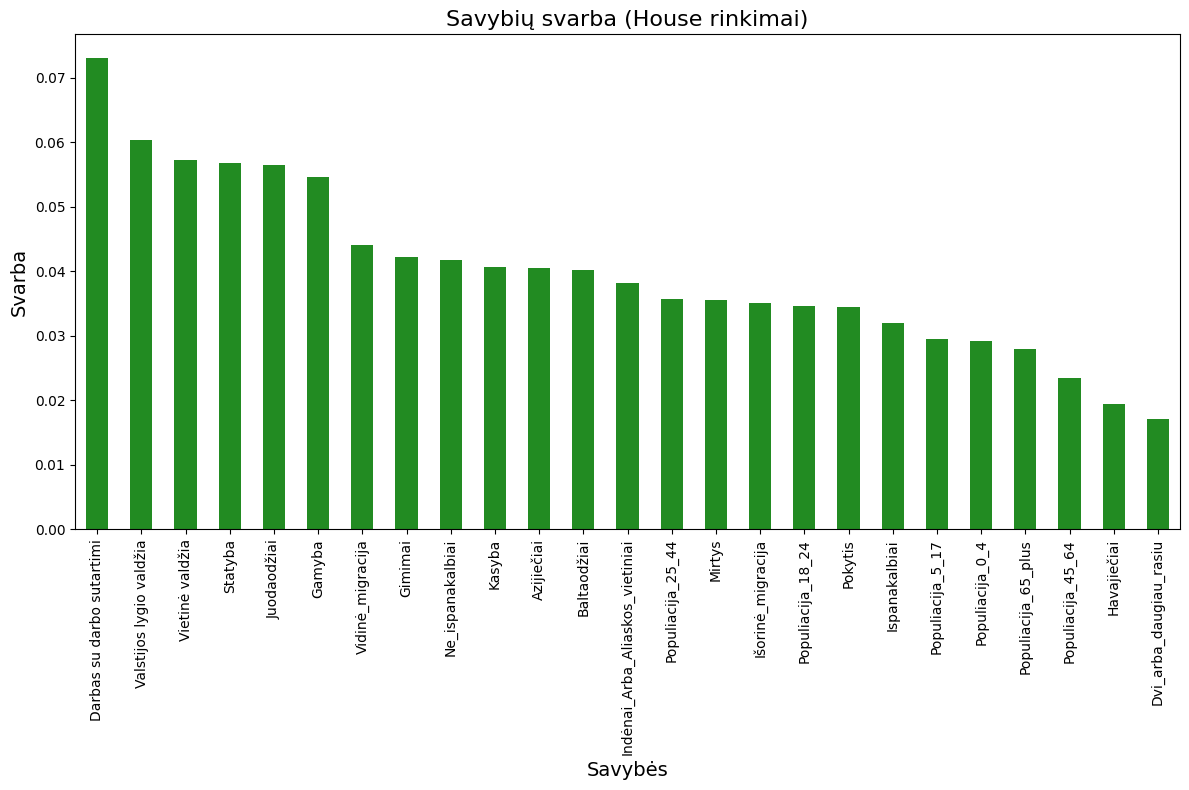

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pasirenkame savybes ir tikslinį kintamąjį
naudotini_stulpeliai = [
    "Populiacija_0_4", "Populiacija_5_17", "Populiacija_18_24",
    "Populiacija_25_44", "Populiacija_45_64", "Populiacija_65_plus",
    "Baltaodžiai", "Juodaodžiai", "Indėnai_Arba_Aliaskos_vietiniai",
    "Azijiečiai", "Havajiečiai", "Dvi_arba_daugiau_rasiu",
    "Ne_ispanakalbiai", "Ispanakalbiai",
    "Darbas su darbo sutartimi", "Kasyba", "Statyba", "Gamyba",
    "Vidinė_migracija", "Išorinė_migracija", "Pokytis",
    "Gimimai", "Mirtys", "Valstijos lygio valdžia", "Vietinė valdžia"
]

# Pasirenkame savybes ir tikslinį kintamąjį
X = house_duomenys[naudotini_stulpeliai]
y = house_duomenys["laimetojas"]

# Užpildome trūkstamas reikšmes
X = X.fillna(X.mean())

# Duomenų padalijimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelio treniravimas
modelis = RandomForestClassifier(n_estimators=100, random_state=42)
modelis.fit(X_train, y_train)

# Savybių svarba
svarba = modelis.feature_importances_
svarbu_savybes = pd.Series(svarba, index=naudotini_stulpeliai).sort_values(ascending=False)

# Braižome svarbos grafą
plt.figure(figsize=(12, 8))
svarbu_savybes.plot(kind="bar", color="forestgreen")
plt.title("Savybių svarba (House rinkimai)", fontsize=16)
plt.xlabel("Savybės", fontsize=14)
plt.ylabel("Svarba", fontsize=14)
plt.tight_layout()
plt.show()

Ekonominiai veiksniai dominuoja:
Darbo sutartys, statyba, gamyba ir migracija yra pagrindiniai rinkimų rezultatų rodikliai. Jie atspindi rinkėjų ekonominius prioritetus.

Rasinė sudėtis:
Rasės ir etninės grupės turi įtakos balsavimui, tačiau jų poveikis priklauso nuo regiono.

Vidutinės svarbos savybės:
Migracija ir gimstamumas gali keisti balsavimo tendencijas, bet jų įtaka mažesnė nei ekonomikos.

Mažiausiai reikšmingi:
Populiacijos amžius ir mažesnės etninės grupės daro mažesnį poveikį.

Išvada:
Ekonomika yra pagrindinis veiksnys prognozuojant „House“ rinkimų rezultatus, tačiau demografiniai rodikliai turi regioninę reikšmę.

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Pasiruošiame duomenis prognozuoti „kandidatų balsai“ „House“ failui
X_house_votes = house_duomenys.drop(columns=["candidatevotes", "laimetojas"])  # Nepriklausomi kintamieji
y_house_votes = house_duomenys["candidatevotes"]  # Tikslinis kintamasis

# Kodavimas ir trūkstamų reikšmių tvarkymas
for col in X_house_votes.select_dtypes(include=["object"]).columns:
    X_house_votes[col] = LabelEncoder().fit_transform(X_house_votes[col].astype(str))
X_house_votes = X_house_votes.fillna(X_house_votes.mean())

# Duomenų padalijimas
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_votes, y_house_votes, test_size=0.2, random_state=42
)

# Atsitiktinių miškų regresorius
rf_house = RandomForestRegressor(n_estimators=100, random_state=42)
rf_house.fit(X_train_house, y_train_house)
y_pred_house = rf_house.predict(X_test_house)

# Rezultatai
mse_house = mean_squared_error(y_test_house, y_pred_house)
r2_house = r2_score(y_test_house, y_pred_house)
print("House duomenys: Kandidatų balsų prognozė")
print(f"Vidutinis kvadratinis nuokrypis (MSE): {mse_house:.2f}")
print(f"R2 rezultatas: {r2_house:.2f}")


House duomenys: Kandidatų balsų prognozė
Vidutinis kvadratinis nuokrypis (MSE): 749399634.26
R2 rezultatas: 0.82


Rezultatų interpretacija:

Vidutinis kvadratinis nuokrypis (MSE): 749,399,634.26
Ką tai reiškia?
Vidutinis kvadratinis nuokrypis (Mean Squared Error - MSE) rodo, kiek prognozuojamos balsų reikšmės vidutiniškai nukrypsta nuo tikrųjų vertybių.

MSE yra išreikštas kandidatų balsų kvadratinėmis vienetais.
Šiuo atveju, modelis vidutiniškai klaidingai prognozuoja kandidato balsų skaičių su kvadratine paklaida ~749,399,634 balsų.

Nustatymo koeficientas (R²): 0.82
Ką tai reiškia?
R² (nustatymo koeficientas) matuoja, kokia dalis tikrųjų duomenų dispersijos paaiškinama modeliu.
R² reikšmė yra tarp 0 ir 1:
1.0: Modelis visiškai tiksliai paaiškina duomenų dispersiją.
0.0: Modelis nepaaiškina jokios duomenų dispersijos.

0.82 reikšmė rodo, kad modelis paaiškina 82% tikrųjų kandidatų balsų variacijos. Tai rodo, kad modelis yra gana tikslus, tačiau vis dar yra 18% variacijos, kurios modelis negali paaiškinti.

Išvados:
Modelio stiprybė: Modelis prognozuoja kandidatų balsų skaičių su gana aukštu tikslumu (82% dispersijos paaiškinama modeliu). Tai rodo, kad pasirinkti nepriklausomi kintamieji (pvz., populiacijos charakteristikos, demografiniai duomenys) yra gerai susiję su balsų rezultatais.

Modelio silpnumai: Vidutinis kvadratinis nuokrypis yra gana didelis. Tai rodo, kad yra kandidatų su labai aukštu balsų skaičiumi (pvz., populiariose valstijose), kuriuos modelis sunkiau prognozuoja.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Pasiruošiame „House“ rinkimų duomenis
naudotini_stulpeliai = [
    "Populiacija_0_4", "Populiacija_5_17", "Populiacija_18_24",
    "Populiacija_25_44", "Populiacija_45_64", "Populiacija_65_plus",
    "Baltaodžiai", "Juodaodžiai", "Indėnai_Arba_Aliaskos_vietiniai",
    "Azijiečiai", "Havajiečiai", "Dvi_arba_daugiau_rasiu",
    "Ne_ispanakalbiai", "Ispanakalbiai",
    "Darbas su darbo sutartimi", "Kasyba", "Statyba", "Gamyba",
    "Vidinė_migracija", "Išorinė_migracija", "Pokytis",
    "Gimimai", "Mirtys", "Valstijos lygio valdžia", "Vietinė valdžia"
]
X = house_duomenys[naudotini_stulpeliai]
y = house_duomenys["laimetojas"]

# Kodavimas tiksliniam kintamajam
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)  # (One-hot) kodavimas

# Trūkstamų reikšmių tvarkymas (užpildome vidurkiu)
X = X.fillna(X.mean())

# Normalizuojame nepriklausomus kintamuosius
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Persamplavimas su SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
y_resampled = to_categorical(y_resampled)

# Padalijame duomenis į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Sukuriame neuroninį tinklą
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation="relu"),  # Pirmas sluoksnis
    Dropout(0.3),                                       # Atsitiktinis mazgų išjungimas
    Dense(32, activation="relu"),                       # Antras sluoksnis
    Dropout(0.3),
    Dense(y.shape[1], activation="softmax")             # Išėjimo sluoksnis
])

# Kompiliuojame modelį
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Treniruojame modelį
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Įvertiname modelį
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testavimo tikslumas: {accuracy:.2f}")

# Prognozės
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Klasifikacijos ataskaita
print("Klasifikacijos ataskaita:")
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/50


c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.5257 - loss: 0.7111 - val_accuracy: 0.5582 - val_loss: 0.6812
Epoch 2/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.5422 - loss: 0.6878 - val_accuracy: 0.5609 - val_loss: 0.6803
Epoch 3/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.5493 - loss: 0.6844 - val_accuracy: 0.5792 - val_loss: 0.6782
Epoch 4/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.5606 - loss: 0.6812 - val_accuracy: 0.5815 - val_loss: 0.6762
Epoch 5/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.5652 - loss: 0.6808 - val_accuracy: 0.5755 - val_loss: 0.6781
Epoch 6/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.5643 - loss: 0.6802 - val_accuracy: 0.5767 - val_loss: 0.6763
Epoch 7/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.5706 - loss: 0.6778 - val_accuracy: 0.5789 - val_loss: 0.6773
Epoch 8/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.5689 - loss: 0.6800 - val_accurac

Klasifikacijos ataskaita:

Tikslumas („accuracy“) – 58%: Modelis vos lenkia atsitiktinį spėjimą (50%).

Tikslumas („precision“)

Klasė 0 (Nelaimėjo): 59% teisingai klasifikuota.

Klasė 1 (Laimėjo): 58% teisingai klasifikuota.

Jautrumas („recall“)

Klasė 0 (Nelaimėjo): 51% teisingai identifikuota.

Klasė 1 (Laimėjo): 65% teisingai identifikuota.

F1 rodiklis
Klasė 0: 0.55.
Klasė 1: 0.61.

Stiprybė: Geresnė klasės „Laimėjo“ (1) identifikacija (jautrumas – 65%).
Trūkumai: Vidutinis tikslumas, žemas jautrumas „Nelaimėjo“ klasei (51%), subalansavimo stoka.

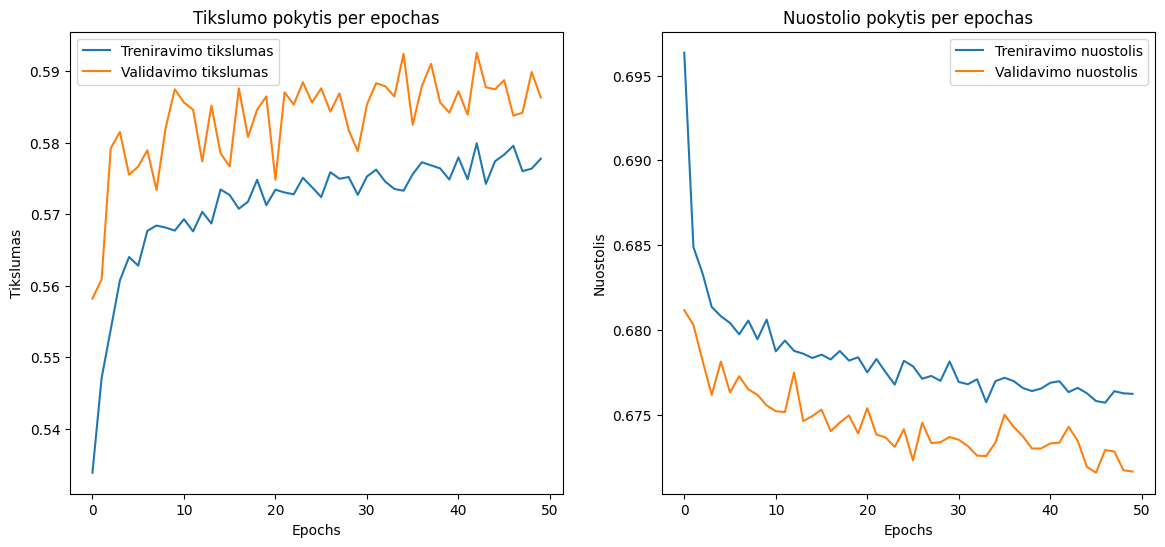

In [37]:
# Vizualizuojame mokymosi istoriją
plt.figure(figsize=(14, 6))

# Tikslumo pokytis
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Treniravimo tikslumas")
plt.plot(history.history["val_accuracy"], label="Validavimo tikslumas")
plt.xlabel("Epochs")
plt.ylabel("Tikslumas")
plt.legend()
plt.title("Tikslumo pokytis per epochas")

# Nuostolio pokytis
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Treniravimo nuostolis")
plt.plot(history.history["val_loss"], label="Validavimo nuostolis")
plt.xlabel("Epochs")
plt.ylabel("Nuostolis")
plt.legend()
plt.title("Nuostolio pokytis per epochas")

plt.show()

Treniravimo tikslumas stabilizuojasi ties 0.59, validavimo – ties 0.58.
Nėra pertreniruotumo, tačiau modelio našumas ribotas.

Treniravimo ir validavimo nuostoliai stabilizuojasi ties ~0.67, rodo vidutinį modelio mokymosi efektyvumą.

Tikslumas (~58–59%) rodo vidutinį našumą.
Treniravimo ir validavimo kreivės panašios – modelis gerai generalizuoja.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Pasiruošiame House duomenis
naudotini_stulpeliai = [
    "Populiacija_0_4", "Populiacija_5_17", "Populiacija_18_24",
    "Populiacija_25_44", "Populiacija_45_64", "Populiacija_65_plus",
    "Baltaodžiai", "Juodaodžiai", "Indėnai_Arba_Aliaskos_vietiniai",
    "Azijiečiai", "Havajiečiai", "Dvi_arba_daugiau_rasiu",
    "Ne_ispanakalbiai", "Ispanakalbiai",
    "Darbas su darbo sutartimi", "Kasyba", "Statyba", "Gamyba",
    "Vidinė_migracija", "Išorinė_migracija", "Pokytis",
    "Gimimai", "Mirtys", "Valstijos lygio valdžia", "Vietinė valdžia"
]
X = house_duomenys[naudotini_stulpeliai]
y = house_duomenys["laimetojas"]

# Kodavimas tiksliniam kintamajam
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Trūkstamų reikšmių tvarkymas
X = X.fillna(X.mean())

# Normalizuojame nepriklausomus kintamuosius
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Persamplavimas su SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
y_resampled = to_categorical(y_resampled)

# Padalijame duomenis į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Sukuriame neuroninį tinklą
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(y.shape[1], activation="softmax")
])

# Kompiliuojame modelį
model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

# Treniruojame modelį
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Įvertiname modelį
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testavimo tikslumas: {accuracy:.2f}")

# Prognozės
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Klasifikacijos ataskaita
print("Klasifikacijos ataskaita:")
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/100


c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5081 - loss: 0.8523 - val_accuracy: 0.5535 - val_loss: 0.6823
Epoch 2/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5298 - loss: 0.7143 - val_accuracy: 0.5693 - val_loss: 0.6793
Epoch 3/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.5356 - loss: 0.6975 - val_accuracy: 0.5734 - val_loss: 0.6781
Epoch 4/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.5433 - loss: 0.6897 - val_accuracy: 0.5760 - val_loss: 0.6775
Epoch 5/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.5492 - loss: 0.6863 - val_accuracy: 0.5809 - val_loss: 0.6767
Epoch 6/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5607 - loss: 0.6826 - val_accuracy: 0.5775 - val_loss: 0.6771
Epoch 7/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.5546 - loss: 0.6841 - val_accuracy: 0.5745 - val_loss: 0.6767
Epoch 8/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.5629 - loss: 0.6807 - val_accu

Tikslumas (accuracy): Išlieka 58%, nėra pagerėjimo.
Precision (tikslumas): Klasės 0 ir 1 – 0.58.
Recall (jautrumas): Klasė 0 – 0.58, Klasė 1 – 0.59 (nežymus pagerėjimas).
F1-score: Klasė 0 – 0.58, Klasė 1 – 0.59.

Rezultatai iš esmės nepasikeitė. Modelis vis dar vidutiniškai veikia.

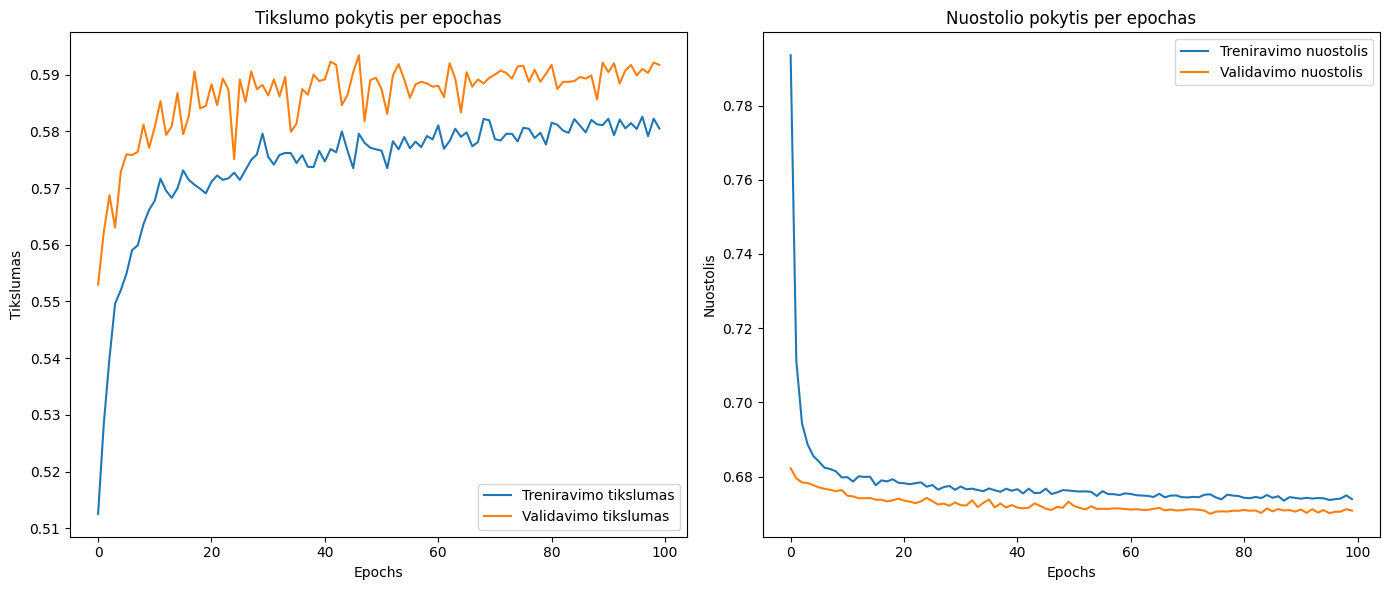

In [40]:
# Vizualizacija
plt.figure(figsize=(14, 6))

# Tikslumo grafikas
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Treniravimo tikslumas")
plt.plot(history.history["val_accuracy"], label="Validavimo tikslumas")
plt.xlabel("Epochs")
plt.ylabel("Tikslumas")
plt.title("Tikslumo pokytis per epochas")
plt.legend()

# Nuostolio grafikas
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Treniravimo nuostolis")
plt.plot(history.history["val_loss"], label="Validavimo nuostolis")
plt.xlabel("Epochs")
plt.ylabel("Nuostolis")
plt.title("Nuostolio pokytis per epochas")
plt.legend()

plt.tight_layout()
plt.show()


Dabartiniuose grafikuose matyti lėtesnis tikslumo augimas per epochas, palyginti su ankstesniais. Tikslumas stabilizuojasi apie 0.59, kas yra panašu į ankstesnius rezultatus.

Validavimo tikslumo linija rodo geresnį stabilumą, tačiau bendrai reikšmingo pagerėjimo nėra.

Nuostolis tiek treniravimo, tiek validavimo rinkiniuose mažėja, stabilizuojasi ties 0.68–0.70. Grafikai rodo mažesnį nuostolio kitimą.

Grafikai rodo panašų rezultatų lygį kaip ankstesniuose bandymuose, o validavimo tikslumas išlieka stabilus. Pagerėjimo ženklių nėra.